In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from itertools import product
%matplotlib inline

In [2]:
import plotly.io as pio
pio.templates.default = "plotly"

In [3]:
df = pd.read_csv('./data/State of Data 2021 - Dataset - Pgina1.csv')

c:\Users\Farley\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#Valores Nan em nível de ensino
df["('P1_h ', 'Nivel de Ensino')"] = df["('P1_h ', 'Nivel de Ensino')"].replace({'Prefiro não informar': None})
#Ajustando coluna de experiência
experience = ['Não tenho experiência na área de dados',
'Menos de 1 ano',
'de 1 a 2 anos',
'de 2 a 3 anos',
'de 4 a 5 anos',
'de 6 a 10 anos',
'Mais de 10 anos']
df["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"] = pd.Categorical(df["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"], ordered=True, categories=experience)
#Ajustando coluna de faixa salarial
df["('P2_h ', 'Faixa salarial')"] = df["('P2_h ', 'Faixa salarial')"].replace({'Menos de R$ 1.000/mês' : "até R$1k",
                                             'de R$ 1.001/mês a R$ 2.000/mês'  : "R$1k-2k",
                                             'de R$ 2.001/mês a R$ 3000/mês'   : "R$2k-3k",
                                             'de R$ 3.001/mês a R$ 4.000/mês'  : "R$3k-4k", 
                                             'de R$ 4.001/mês a R$ 6.000/mês'  : "R$4k-6k",
                                             'de R$ 6.001/mês a R$ 8.000/mês'  : "R$6k-8k",
                                             'de R$ 8.001/mês a R$ 12.000/mês' : "R$8k-12k",
                                             'de R$ 12.001/mês a R$ 16.000/mês' : "R$12k-16k",
                                             'de R$ 16.001/mês a R$ 20.000/mês' : "R$16k-20k",
                                             'de R$ 20.001/mês a R$ 25.000/mês' : "R$20k-25k",
                                             'de R$ 25.001/mês a R$ 30.000/mês' : "R$25k-30k",
                                             'de R$ 30.001/mês a R$ 40.000/mês' : "R$30k-40k",
                                             'Acima de R$ 40.001/mês' : "R$40k+"                                      
                                                    })
salary_range = ["até R$1k",
                     "R$1k-2k",
                     "R$2k-3k",
                     "R$3k-4k", 
                     "R$4k-6k",
                     "R$6k-8k",
                     "R$8k-12k",
                     "R$12k-16k",
                     "R$16k-20k",
                     "R$20k-25k",
                     "R$25k-30k",
                     "R$30k-40k",
                     "R$40k+"]
df["('P2_h ', 'Faixa salarial')"] = pd.Categorical(df["('P2_h ', 'Faixa salarial')"], ordered=True, categories=salary_range)
# Atualizando a variável  "('P2_g ', 'Nivel')" da seguinte forma
# Quando a pessoa respondeu que é gestor "('P2_d ', 'Gestor?')" e não respondeu a pergunta "('P2_g ', 'Nivel')", 
# assume-se que o nível é "Gestor"

df.loc[(df["('P2_d ', 'Gestor?')"] == 1) & (df["('P2_g ', 'Nivel')"].isna()), "('P2_g ', 'Nivel')"] = 'Gestor'

#vinculo empregativo
df["Vínculo Empregativo"]=df["('P2_a ', 'Qual sua situação atual de trabalho?')"].replace({
    'Somente Estudante (graduação)': 'Acadêmica/Pesquisador',
    'Desempregado, buscando recolocação': "Desempregado",
    'Somente Estudante (pós-graduação)': 'Acadêmica/Pesquisador',
    'Trabalho na área Acadêmica/Pesquisador':'Acadêmica/Pesquisador',
    'Desempregado e não estou buscando recolocação': "Desempregado",
    'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)': "Trabalho fora do Brasil",
    'Vivo fora do Brasil e trabalho para empresa de fora do Brasil': "Trabalho fora do Brasil",
    #'Empregado (CLT)', 
    #'Empreendedor ou Empregado (CNPJ)',
    #'Servidor Público', 
    #'Estagiário', 
    #'Freelancer',
    'Prefiro não informar':None
})
df['Vínculo Empregativo'] = [a if b!="Gerente/Head/Diretor/VP" else b if a =="Empreendedor ou Empregado (CNPJ)" else a for a,b in zip(df['Vínculo Empregativo'], df["('P2_e ', 'Cargo como Gestor')"])]
df['Vínculo Empregativo'] = df['Vínculo Empregativo'].replace({'Gerente/Head/Diretor/VP':'Empreendedor (CNPJ)','Empreendedor ou Empregado (CNPJ)':'Empregado (CNPJ)'})

#modelo
df.replace({"Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)": "Híbrido flexível",
            "Modelo híbrido com dias fixos de trabalho presencial": "Híbrido presenciais fixos",
            "Modelo 100% remoto": "Remoto", 
            "Modelo 100% presencial": "Presencial",
       },inplace=True)

In [5]:
columns=df.columns

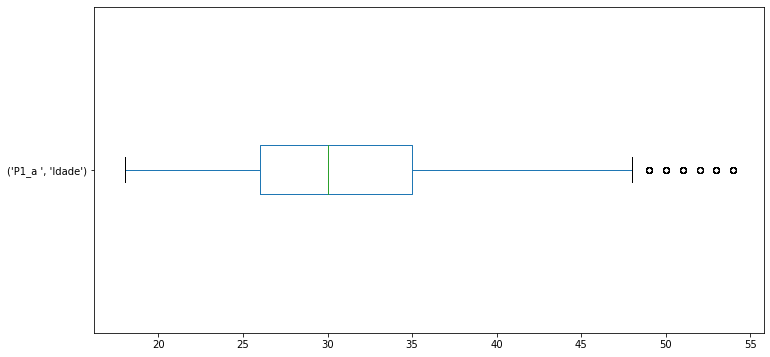

In [6]:
# boxplot idade fizemos em Pandas (Check)
df["('P1_a ', 'Idade')"].plot(kind='box', figsize=(12,6), vert=False);

# FARLEY FAÇA SUA MÁGICA!!!

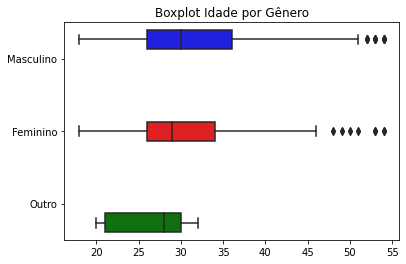

In [7]:
from matplotlib.pyplot import legend


ax = sns.boxplot(data=df, x="('P1_a ', 'Idade')", y="('P1_b ', 'Genero')", hue="('P1_b ', 'Genero')", palette=['blue','red','green'], orient='h')
ax.set(xlabel="",ylabel="",title='Boxplot Idade por Gênero')
plt.legend([],[], frameon=False)

In [8]:
df_genero = df_a["(\'P1_b \', \'Genero\')"].value_counts().reset_index()
plt.pie("(\'P1_b \', \'Genero\')", data=df_genero, labels = 'index', autopct='%.2f%%', explode = (0.1, 0.1, 0.1))
plt.title('Distribuição de gêneros', fontsize=15)
plt.show()

NameError: name 'df_a' is not defined

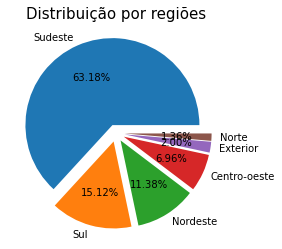

In [ ]:
df_regiao = df_a[ "('P1_e_b ', 'Regiao onde mora')"].value_counts().reset_index()
plt.pie("('P1_e_b ', 'Regiao onde mora')", data=df_regiao, labels = 'index', autopct='%.2f%%', explode = [0.1]*6)
plt.title('Distribuição por regiões', fontsize=15)
plt.show()

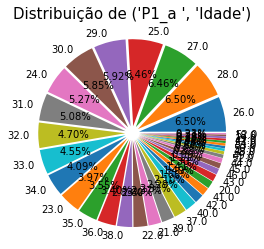

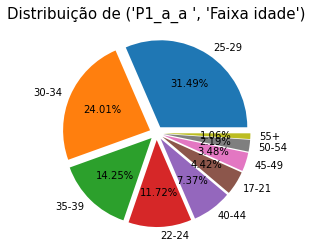

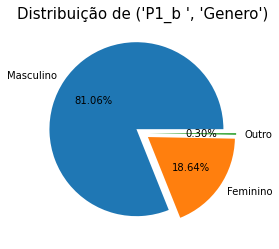

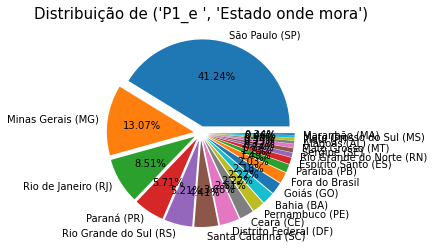

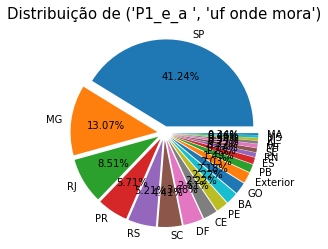

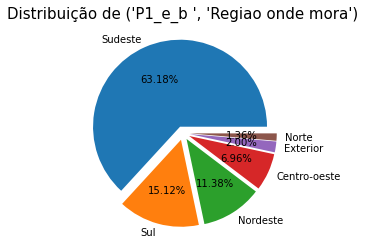

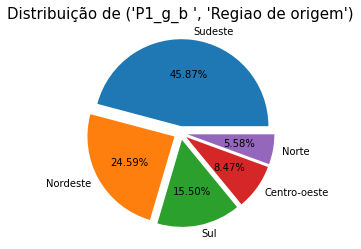

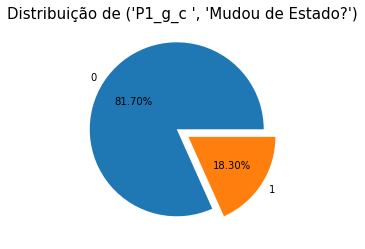

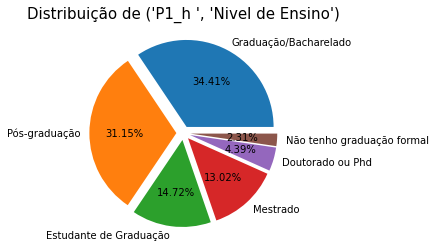

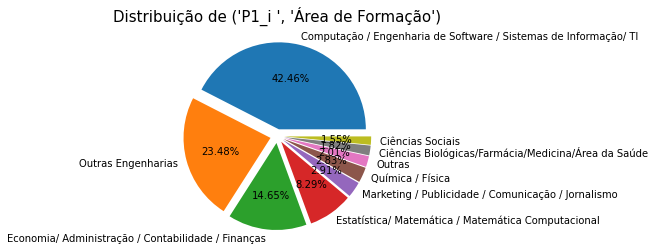

In [ ]:
for col in df_p1.columns:

    df_var= df_a[col].value_counts().reset_index()
    plt.pie(col, data=df_var, labels = 'index', autopct='%.2f%%', explode = [0.08]*df_var.shape[0])
    plt.title('Distribuição de '+str(col), fontsize=15)
    plt.show()

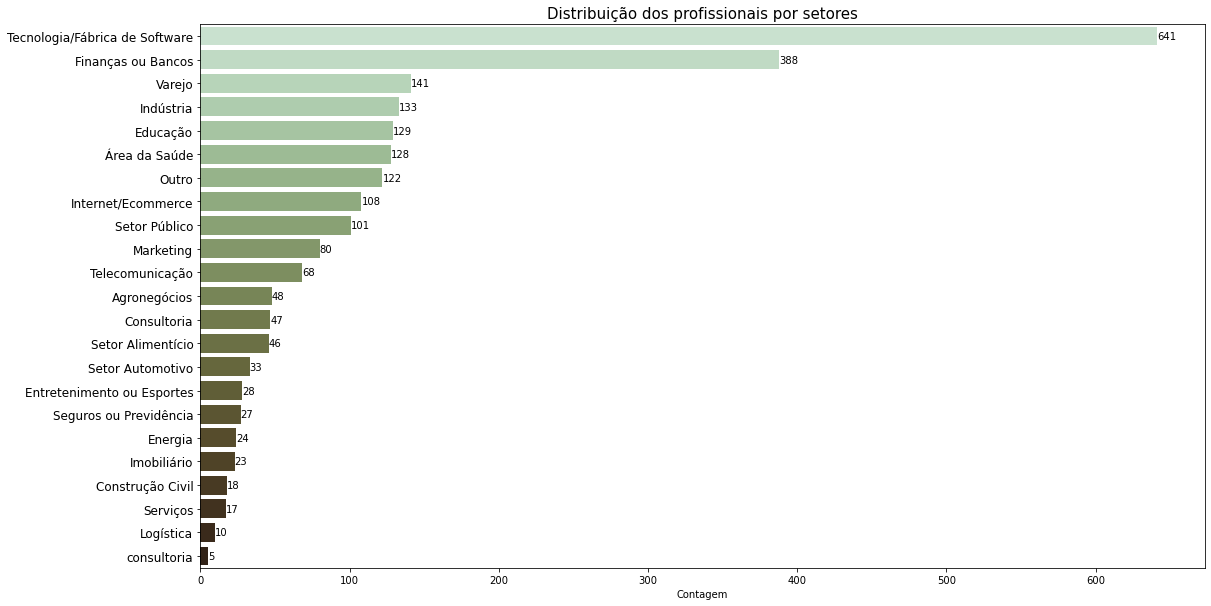

In [12]:

fig = plt.figure(figsize=(18,10))
ax = sns.countplot(data=df, y="('P2_b ', 'Setor')", palette='ch:22', order = df["('P2_b ', 'Setor')"].value_counts().index, orient='h')
ax.bar_label(ax.containers[0])
ax.set(ylabel="",xlabel="Contagem")
ax.set_title('Distribuição dos profissionais por setores', fontsize=15)
ax.set_yticklabels(df["('P2_b ', 'Setor')"].value_counts().index, size = 12)
plt.show()

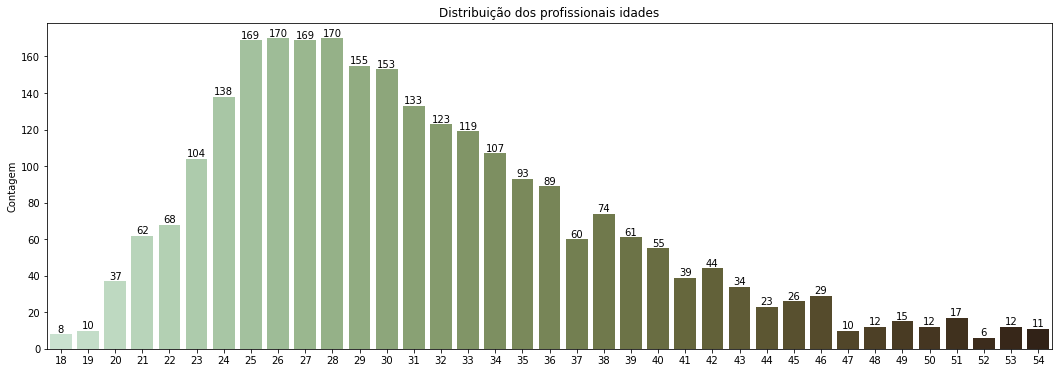

In [ ]:
df_idade = df["('P1_a ', 'Idade')"].dropna().astype('int').reset_index()
# df["('P1_a ', 'Idade')"] = df["('P1_a ', 'Idade')"].astype('int')

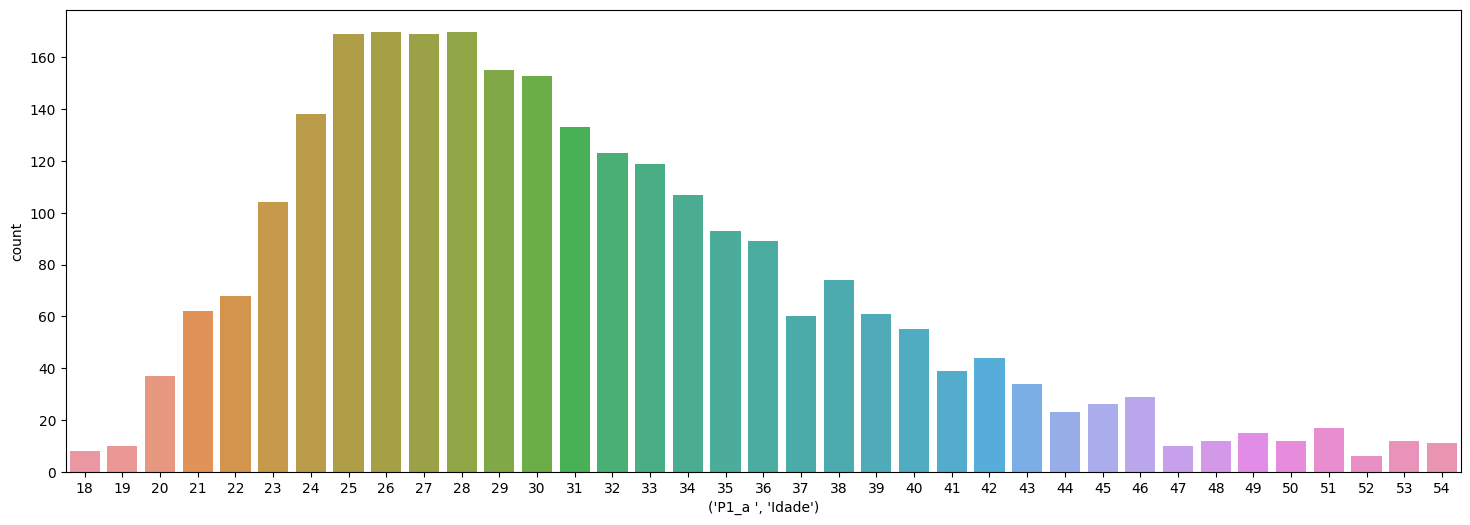

In [ ]:
fig = plt.figure(figsize=(18,6))
ax = sns.countplot(data=df_idade, x="('P1_a ', 'Idade')", palette='ch:22')
ax.bar_label(ax.containers[0])
ax.set(xlabel="",ylabel="Contagem",title='Distribuição dos profissionais idades')
plt.show()


Idade 
P1_e_b Região (Pizza) por Salário P2_h *
P2_h Salário (Barra "Histograma") por Região P1_e_b

salário por escolaridade (barra) 

vinculos**

P2_h Salário x Tempo experiência dados P2_i (Linhas)
P2_h Salário x Tempo experiência TI P2_j (Linhas)
P2_h Salário x Linguagem mais utilizada P4_e

tempo de experiência dados histograma

P4_eLinguagem mais utilizada (barras ou pizza)
P4_eLinguagem mais utilizada Tempo experiência dados P2_i

Cientista de Dados
P8_d Atividade q mais gasta o tempo (Pizza)

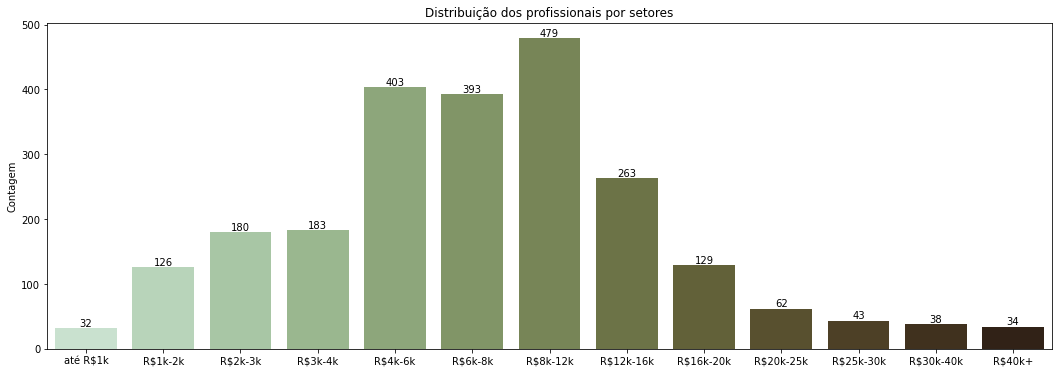

In [ ]:

fig = plt.figure(figsize=(18,6))
ax = sns.countplot(data=df, x="('P2_h ', 'Faixa salarial')", palette='ch:22')
ax.bar_label(ax.containers[0])
ax.set(xlabel="",ylabel="Contagem",title='Distribuição dos profissionais por setores')
#ax.set_yticklabels(df_a["('P2_b ', 'Setor')"].value_counts().index, size = 12)
#plt.xticks(rotation=80)
plt.show()

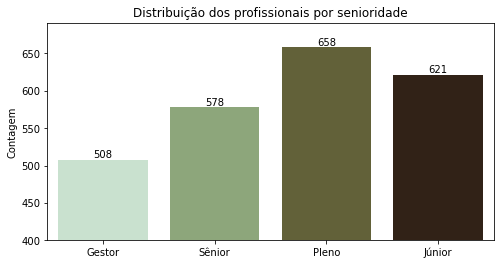

In [ ]:
fig = plt.figure(figsize=(8,4))
ax = sns.countplot(data=df, x= "('P2_g ', 'Nivel')", palette='ch:22')
ax.bar_label(ax.containers[0])
ax.set(ylabel="Contagem",xlabel="",title='Distribuição dos profissionais por senioridade')
ax.set_ylim(ymin=400)
plt.show()


In [ ]:
salary_prop = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df['Vínculo Empregativo'],normalize='columns')*100

fig = px.line(salary_prop, x=salary_prop.index, y=salary_prop.columns, markers=True, title="Proporções de faixas-salariais por tipo vínculo empregativo",
 labels={
                     "value": "Proporção",
                     "('P2_h ', 'Faixa salarial')": "Faixas salariais ",
                     "Vínculo Empregativo": ""
                 }, color_discrete_sequence=px.colors.qualitative.G10)
fig.show()


In [ ]:
regiao_prop = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df["('P1_e_b ', 'Regiao onde mora')"],normalize=True)*100
regiao_prop

fig = px.line(regiao_prop, x=regiao_prop.index, y=regiao_prop.columns, markers=True, title="Proporções de faixas-salariais por região",
 labels={
                     "value": "Proporção",
                     "('P2_h ', 'Faixa salarial')": "Faixas salariais ",
                     "('P1_e_b ', 'Regiao onde mora')": ""
                 }, color_discrete_sequence=px.colors.qualitative.G10)

fig.show()

In [ ]:
sexo_prop = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df["('P1_b ', 'Genero')"],normalize='columns')*100
sexo_prop

fig = px.line(sexo_prop, x=sexo_prop.index, y=sexo_prop.columns, markers=True, title="Proporções de faixas-salariais por gênero",
 labels={
                     "value": "Proporção",
                     "('P2_h ', 'Faixa salarial')": "Faixas salariais ",
                     "('P1_b ', 'Genero')": ""
                 }, color_discrete_sequence=['Red','Blue','Black'])
                

fig.show()

In [ ]:
nivel_prop = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df["('P2_g ', 'Nivel')"],normalize='columns')*100
nivel_prop

fig = px.line(nivel_prop, x=nivel_prop.index, y=nivel_prop.columns, markers=True,title="Proporções de faixas-salariais por nível de senioridade",
 labels={
                     "value": "Proporção",
                     "('P2_h ', 'Faixa salarial')": "Faixas salariais ",
                     "('P2_g ', 'Nivel')": ""
                 })
                

fig.show()

In [ ]:
experiencia_prop = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"],normalize='columns')*100
experiencia_prop

fig = px.line(experiencia_prop, x=experiencia_prop.index, y=experiencia_prop.columns, markers=True, title="Proporções de faixas-salariais por tempo de experiência em Dados",
 labels={
                     "value": "Proporção",
                     "('P2_h ', 'Faixa salarial')": "Faixas salariais ",
                     "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')": ""
                 }, color_discrete_sequence=px.colors.qualitative.Dark24)
                

fig.show()

In [ ]:
df["('P2_r ', 'Qual a forma de trabalho ideal para você?')"].replace({np.nan:"ignore"},inplace=True)
df["('P2_r ', 'Qual a forma de trabalho ideal para você?')"].unique()

array(['Híbrido presenciais fixos', 'Remoto', 'Híbrido flexível',
       'Presencial', 'ignore'], dtype=object)

In [ ]:

fig = px.sunburst(df[df["('P2_r ', 'Qual a forma de trabalho ideal para você?')"]!="ignore"], path=["('P2_q ', 'Atualmente qual a sua forma de trabalho?')", "('P2_r ', 'Qual a forma de trabalho ideal para você?')"])
fig.update_traces(textinfo="percent entry+label")
fig.show()

In [9]:
df["('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?')"].value_counts()

SQL, Python                                    510
Python, SQL                                    166
SQL                                            158
Não utilizo nenhuma das linguagens listadas    155
Python                                          96
                                              ... 
Python, SQL, Julia                               1
SQL, R, Python, SAS/Stata, Matlab                1
SQL, R, Python, Java                             1
SAS/Stata, Java                                  1
Python, SQL, Java, JavaScript                    1
Name: ('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?'), Length: 221, dtype: int64

In [11]:
df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts()

Python                                         736
SQL                                            731
Não utilizo nenhuma das linguagens listadas    166
R                                               81
Visual Basic/VBA                                46
JavaScript                                      22
Scala                                           19
SAS/Stata                                       18
C/C++/C#                                        13
Java                                            12
PHP                                              8
.NET                                             4
Matlab                                           1
Name: ('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?'), dtype: int64

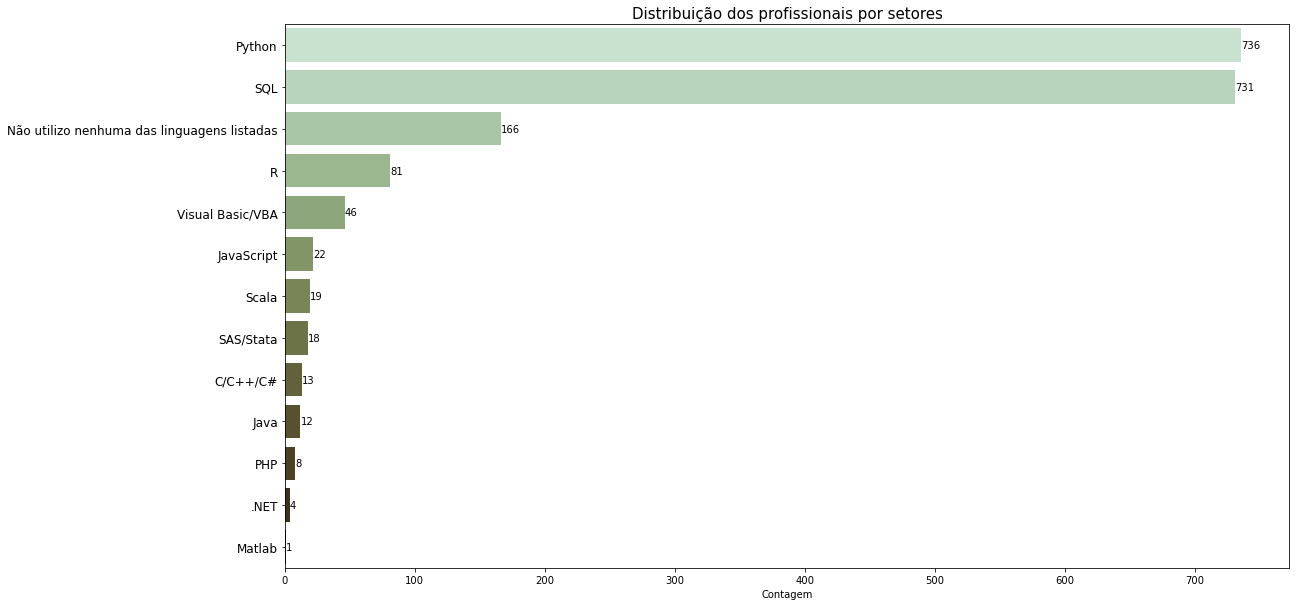

In [14]:
fig = plt.figure(figsize=(18,10))
ax = sns.countplot(data=df, y="('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')", palette='ch:22', order = df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts().index, orient='h')
ax.bar_label(ax.containers[0])
ax.set(ylabel="",xlabel="Contagem")
ax.set_title('Distribuição dos profissionais por setores', fontsize=15)
ax.set_yticklabels(df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts().index, size = 12)
plt.show()

In [15]:
list(columns)

["('P0', 'id')",
 "('P1_a ', 'Idade')",
 "('P1_a_a ', 'Faixa idade')",
 "('P1_b ', 'Genero')",
 "('P1_e ', 'Estado onde mora')",
 "('P1_e_a ', 'uf onde mora')",
 "('P1_e_b ', 'Regiao onde mora')",
 "('P1_g_b ', 'Regiao de origem')",
 "('P1_g_c ', 'Mudou de Estado?')",
 "('P1_h ', 'Nivel de Ensino')",
 "('P1_i ', 'Área de Formação')",
 "('P2_a ', 'Qual sua situação atual de trabalho?')",
 "('P2_b ', 'Setor')",
 "('P2_c ', 'Numero de Funcionarios')",
 "('P2_d ', 'Gestor?')",
 "('P2_e ', 'Cargo como Gestor')",
 "('P2_f ', 'Cargo Atual')",
 "('P2_g ', 'Nivel')",
 "('P2_h ', 'Faixa salarial')",
 "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
 "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",
 "('P2_k ', 'Você está satisfeito na sua empresa atual?')",
 "('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')",
 "('P2_l_a ', 'Falta de oportunidade de cresciment

In [17]:
df_ling = [c for c in df.columns if "('P4_d_" in c]
df_ling

["('P4_d_a ', 'SQL')",
 "('P4_d_b ', 'R ')",
 "('P4_d_c ', 'Python')",
 "('P4_d_d ', 'C/C++/C#')",
 "('P4_d_e ', '.NET')",
 "('P4_d_f ', 'Java')",
 "('P4_d_g ', 'Julia')",
 "('P4_d_h ', 'SAS/Stata')",
 "('P4_d_i ', 'Visual Basic/VBA')",
 "('P4_d_j ', 'Scala')",
 "('P4_d_k ', 'Matlab')",
 "('P4_d_l ', 'PHP')",
 "('P4_d_m ', 'Javascript')",
 "('P4_d_n ', 'Não utilizo nenhuma linguagem')"]

In [ ]:
"('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')",
"('P7_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')",
"('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')",

In [41]:
df['engenheiro'] = [1 if a.lower() != 'nan' else 0 for a in df["('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')"].astype('str')]
df['analista'] = [1 if a != 'nan' else 0 for a in df["('P7_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')"].astype('str')]
df['cientista'] = [1 if a != 'nan' else 0 for a in df["('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')"].astype('str')]

In [44]:
engenheiro="('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')"
analista="('P7_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')"
cientista="('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')"

df[engenheiro].fillna(np.nan,inplace=True)
df[analista].fillna(np.nan,inplace=True)
df[cientista].fillna(np.nan,inplace=True)
df['profissao'] = ["Engenheiro Dados" if str(a)!="nan" else "Analista Dados" if str(b) !="nan" else "Cientista Dados" if str(c)!="nan" else np.nan for a,b,c in zip(df[engenheiro], df[analista],df[cientista])]

In [54]:
df.shape[0]  - df['profissao'].value_counts().sum()

980

In [144]:
list(columns)

["('P0', 'id')",
 "('P1_a ', 'Idade')",
 "('P1_a_a ', 'Faixa idade')",
 "('P1_b ', 'Genero')",
 "('P1_e ', 'Estado onde mora')",
 "('P1_e_a ', 'uf onde mora')",
 "('P1_e_b ', 'Regiao onde mora')",
 "('P1_g_b ', 'Regiao de origem')",
 "('P1_g_c ', 'Mudou de Estado?')",
 "('P1_h ', 'Nivel de Ensino')",
 "('P1_i ', 'Área de Formação')",
 "('P2_a ', 'Qual sua situação atual de trabalho?')",
 "('P2_b ', 'Setor')",
 "('P2_c ', 'Numero de Funcionarios')",
 "('P2_d ', 'Gestor?')",
 "('P2_e ', 'Cargo como Gestor')",
 "('P2_f ', 'Cargo Atual')",
 "('P2_g ', 'Nivel')",
 "('P2_h ', 'Faixa salarial')",
 "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
 "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",
 "('P2_k ', 'Você está satisfeito na sua empresa atual?')",
 "('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')",
 "('P2_l_a ', 'Falta de oportunidade de cresciment

In [36]:
df["('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')"][0]

nan

In [56]:
df['profissao']

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
              ...       
2640                 NaN
2641     Cientista Dados
2642    Engenheiro Dados
2643                 NaN
2644                 NaN
Name: profissao, Length: 2645, dtype: object

In [124]:

prof_sal_cross = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df['profissao'],normalize='columns')*100
prof_sal_cross = prof_sal_cross.reset_index()

In [115]:
prof_sal_cross

profissao,salario,Analista Dados,Cientista Dados,Engenheiro Dados
0,< R$2k,9.069494,7.766990,2.722772
1,R$12k-16k,5.418139,11.165049,13.861386
2,R$16k-20k,1.531213,4.854369,4.950495
3,R$20k+,1.531213,5.339806,7.673267
4,R$2k-3k,12.485277,3.883495,4.950495
5,R$3k-4k,12.367491,5.582524,6.930693
6,R$4k-6k,23.085984,16.747573,15.841584
7,R$6k-8k,16.843345,20.388350,20.049505
8,R$8k-12k,17.667845,24.271845,23.019802


In [128]:
prof_sal_cross_melt = prof_sal_cross.melt(id_vars="('P2_h ', 'Faixa salarial')")
prof_sal_cross_melt

,"('P2_h ', 'Faixa salarial')",profissao,value
0,até R$1k,Analista Dados,1.531213
1,R$1k-2k,Analista Dados,7.538280
2,R$2k-3k,Analista Dados,12.485277
3,R$3k-4k,Analista Dados,12.367491
4,R$4k-6k,Analista Dados,23.085984
5,R$6k-8k,Analista Dados,16.843345
6,R$8k-12k,Analista Dados,17.667845
7,R$12k-16k,Analista Dados,5.418139
8,R$16k-20k,Analista Dados,1.531213
9,R$20k-25k,Analista Dados,0.824499


In [129]:
prof_sal_cross_melt["salario"] = prof_sal_cross_melt["('P2_h ', 'Faixa salarial')"].replace({'até R$1k':' < R$2k', 'R$1k-2k':' < R$2k', 'R$25k-30k': 'R$20k+', 'R$40k+':'R$20k+',  'R$30k-40k':'R$20k+', 'R$20k-25k':'R$20k+'})

In [94]:
df["('P2_h ', 'Faixa salarial')"].unique()

['R$4k-6k', 'R$6k-8k', 'R$8k-12k', 'R$12k-16k', 'R$3k-4k', ..., 'R$25k-30k', 'R$1k-2k', 'R$2k-3k', 'até R$1k', NaN]
Length: 14
Categories (13, object): ['até R$1k' < 'R$1k-2k' < 'R$2k-3k' < 'R$3k-4k' ... 'R$20k-25k' < 'R$25k-30k' < 'R$30k-40k' < 'R$40k+']

In [143]:
#long_df = px.data.medals_long()

fig =px.bar(prof_sal_cross_melt, y='value',color="salario", x='profissao', color_discrete_sequence= px.colors.sequential.YlOrRd)
fig.update_layout(barmode='stack')
fig.update_traces(marker_line_width=0)
fig.show()

In [118]:
prof_sal_cross['salario'].unique()

array([' < R$2k', 'R$12k-16k', 'R$16k-20k', 'R$20k+', 'R$2k-3k',
       'R$3k-4k', 'R$4k-6k', 'R$6k-8k', 'R$8k-12k'], dtype=object)

In [121]:
salary_range = [' < R$2k',
                     "R$2k-3k",
                     "R$3k-4k", 
                     "R$4k-6k",
                     "R$6k-8k",
                     "R$8k-12k",
                     "R$12k-16k",
                     "R$16k-20k",
                    'R$20k+'
]
prof_sal_cross_melt["salario"] = pd.Categorical(prof_sal_cross_melt["salario"], ordered=True, categories=salary_range)

In [146]:
prof_lang_cross = pd.crosstab(df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"],df['profissao'],normalize='columns')*100
prof_lang_cross = prof_lang_cross.reset_index()
prof_lang_cross_melt = prof_lang_cross.melt(id_vars="('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')")
prof_lang_cross_melt

,"('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')",profissao,value
0,.NET,Analista Dados,0.000000
1,C/C++/C#,Analista Dados,0.235571
2,Java,Analista Dados,0.000000
3,JavaScript,Analista Dados,0.824499
4,Matlab,Analista Dados,0.000000
5,Não utilizo nenhuma das linguagens listadas,Analista Dados,11.189635
6,PHP,Analista Dados,0.235571
7,Python,Analista Dados,20.848057
8,R,Analista Dados,4.946996
9,SAS/Stata,Analista Dados,1.177856


In [153]:
df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts()

Python                                         736
SQL                                            731
Não utilizo nenhuma das linguagens listadas    166
R                                               81
Visual Basic/VBA                                46
JavaScript                                      22
Scala                                           19
SAS/Stata                                       18
C/C++/C#                                        13
Java                                            12
PHP                                              8
.NET                                             4
Matlab                                           1
Name: ('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?'), dtype: int64

In [154]:
prof_lang_cross_melt["linguagens"] = prof_lang_cross_melt["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].replace({'Matlab':'Outros', '.NET':'Outros', 'PHP':'Outros'})

In [158]:
fig =px.bar(prof_lang_cross_melt, y='value',color="('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')", x='profissao', color_discrete_sequence= px.colors.sequential.Turbo)
fig.update_layout(barmode='stack')
fig.update_traces(marker_line_width=0)
fig.show()

In [162]:
df["('P8_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?')"].replace({"('P8_d_a ', 'Coletando e limpando os dados que uso para análise e modelagem.')": "Coleta e limpeza de dados",
"('P8_d_b ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')": "Contato com os times de negócio",
"('P8_d_c ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')": "Desenvolvimento de modelos de ML",
"('P8_d_d ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')": "Colocação de modelos em produção, criação de pipelines de dados",
"('P8_d_e ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')": "Manutenção de modelos de ML",
"('P8_d_f ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')": "Construção de dashboards / ferramentas de BI",
"('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')": "Manutenção em ETLs, DAGs e automações",
"('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')": "Soluções de Feature Store, Cultura MLOps",
"('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')": "Infra: clusters, servidores, API, containers"}).value_counts()

Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio., Coletando e limpando os dados que uso para análise e modelagem.                                                                             46
Coletando e limpando os dados que uso para análise e modelagem., Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.                                                                                                                                               38
Coletando e limpando os dados que uso para análise e modelagem., Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).                                                                                                                                                          3

In [170]:
colunas_p8 =[x for x in df.columns if "('P8_d_" in x] + ["('P2_g ', 'Nivel')"]
df[colunas_p8]

prof_lang_cross = pd.crosstab(df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"],df['profissao'],normalize='columns')*100
prof_lang_cross = prof_lang_cross.reset_index()
#prof_lang_cross_melt = prof_lang_cross.melt(id_vars="('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')")
#prof_lang_cross_melt

,"('P8_d_a ', 'Coletando e limpando os dados que uso para análise e modelagem.')","('P8_d_b ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_c ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_d ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_e ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_f ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P2_g ', 'Nivel')"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gestor
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gestor
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gestor
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gestor
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gestor
...,...,...,...,...,...,...,...,...,...,...
2640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2641,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Pleno
2642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pleno
2643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
df_atividades =  df[colunas_p8].groupby("('P2_g ', 'Nivel')").sum().reset_index()

In [178]:
df_atividade_melt = df_atividades.melt(id_vars="('P2_g ', 'Nivel')")

In [182]:
df_atividade_melt_sg = df_atividade_melt[df_atividade_melt["('P2_g ', 'Nivel')"] != 'Gestor']

In [186]:
fig =px.bar(df_atividade_melt_sg, y='value', color="variable", x="('P2_g ', 'Nivel')", color_discrete_sequence= px.colors.sequential.Turbo, barmode='relative')
fig.update_layout(barmode='relative')
fig.update_traces(marker_line_width=0)
fig.show()

In [184]:
df_atividade_melt_sg['prop'] = [df_atividade_melt_sg['value'].apply(lambda x: x/df_atividade_melt_sg['value'].sum())]

,"('P2_g ', 'Nivel')",variable,value
1,Júnior,"('P8_d_a ', 'Coletando e limpando os dados que...",67.0
2,Pleno,"('P8_d_a ', 'Coletando e limpando os dados que...",83.0
3,Sênior,"('P8_d_a ', 'Coletando e limpando os dados que...",56.0
5,Júnior,"('P8_d_b ', 'Entrando em contato com os times ...",19.0
6,Pleno,"('P8_d_b ', 'Entrando em contato com os times ...",43.0
7,Sênior,"('P8_d_b ', 'Entrando em contato com os times ...",34.0
9,Júnior,"('P8_d_c ', 'Desenvolvendo modelos de Machine ...",43.0
10,Pleno,"('P8_d_c ', 'Desenvolvendo modelos de Machine ...",53.0
11,Sênior,"('P8_d_c ', 'Desenvolvendo modelos de Machine ...",43.0
13,Júnior,"('P8_d_d ', 'Colocando modelos em produção, cr...",6.0
